In [10]:
%load_ext autoreload
%autoreload 2

import fit_schechter as fs
import run_LF as LF
import reionizer

import numpy as np
import scipy
import os, sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import multiprocessing
import itertools as it

%matplotlib inline

plt.style.use(['default','seaborn-bright','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Alexa's LF models

In [3]:
LFdict = np.load('../data/allLFvals.npy', allow_pickle=True).item()

In [4]:
z   = np.unique(np.array([k[0] for k in list(LFdict.keys())]))
xHI = np.unique(np.array([k[1] for k in list(LFdict.keys())]))

Text(0, 0.5, '$\\Phi(M)$ [Mpc$^{-3}$]')

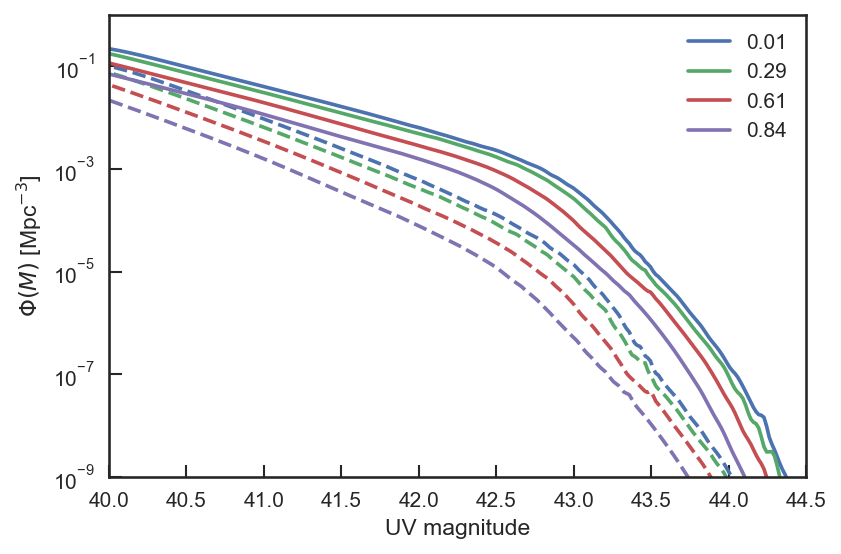

In [5]:
plt.figure(figsize=(6,4), dpi=150)
for x in xHI[::10]:
    ln = plt.semilogy(LF.log10_lg, LFdict[(z[0],x)], label=x)
    plt.semilogy(LF.log10_lg, LFdict[(z[-1],x)], color=ln[0].get_color(), ls='dashed')


plt.legend()
# plt.ylim(1e-9,1)
# plt.xlim(38., 44.5)

plt.ylim(1e-9,1)
plt.xlim(40., 44.5)

plt.xlabel('UV magnitude')
plt.ylabel('$\Phi(M)$ [Mpc$^{-3}$]')

# Fit LFs

In [11]:
def schechter_fit(zval_test, xHI_test, logL_min=41., logL_max=44., 
                  plot=True, plot_chains=False, save=True):
    
    #Call LF function
    log10_LF = LFdict[(zval_test, xHI_test)]
    
    #Emcee Information
    # Run emcee to get posterior samples
    sampler = fs.fit_schechter_emcee(LF.log10_lg[LF.log10_lg > 0.], log10_LF[LF.log10_lg > 0.], 
                                     logL_min=logL_min, logL_max=logL_max)
    
    plotname = f'../data/schechter_runs/logL={logL_min}-{logL_max}_z={zval_test}_xHI={xHI_test}.pdf'
    
    if plot:
        if plot_chains:
            plt.figure()
            fs.plot_emcee(sampler, plotname=plotname, save=save)                
        
        plt.figure()
        fs.plot_emcee_draws(sampler, LF.log10_lg, log10_LF, 
                            xlim=(39.5, 44.5),
#                             xlim=(logL_min-0.5, logL_max+0.5),
                            plotname=plotname, save=save)
        plt.axvline(logL_min)
        plt.axvline(logL_max)

    medians = fs.get_emcee_medians(sampler)
    
    del sampler
    
    return medians

## Test L lims

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

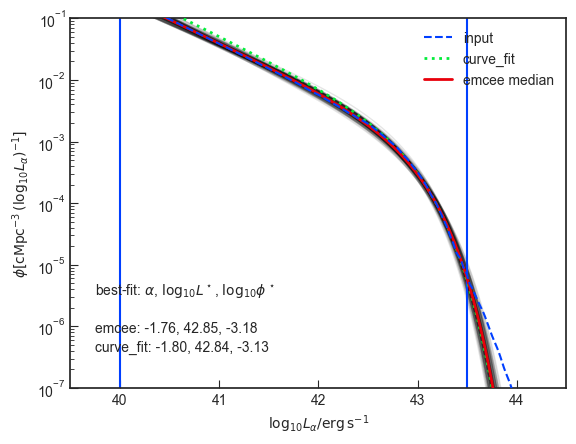

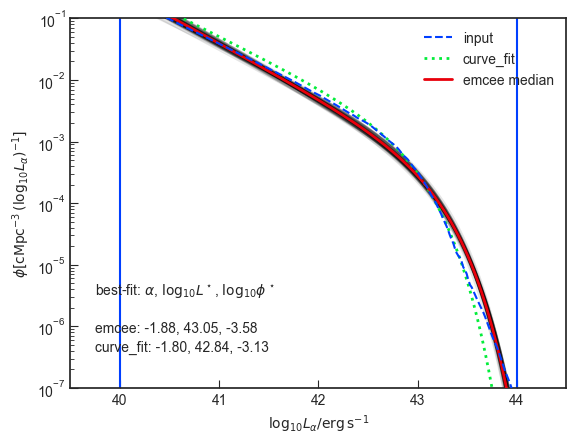

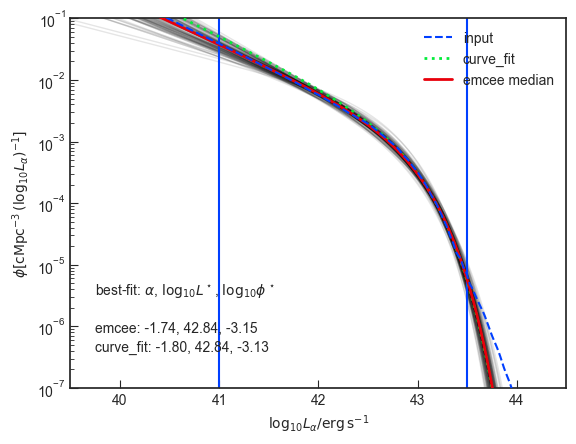

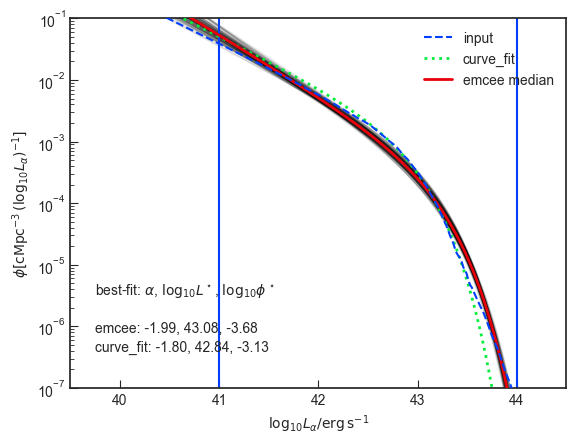

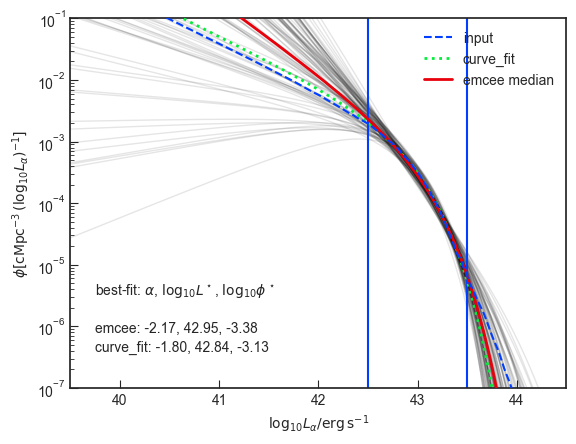

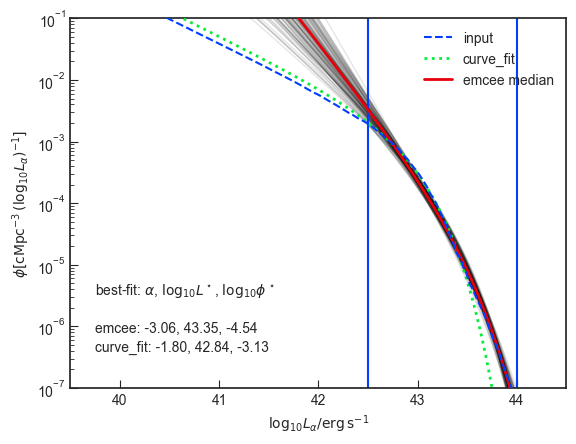

In [105]:
logL_min = [40., 41., 42.5]
logL_max = [43.5, 44.]

for Lmin, Lmax in it.product(logL_min, logL_max):
    schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=Lmin, logL_max=Lmax, plot=True, plot_chains=False)



# Individual limit tests

## 41 -44

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:12<00:00, 81.21it/s]


array([-1.9855984 , 43.08082969, -3.68329516])

<Figure size 640x480 with 0 Axes>

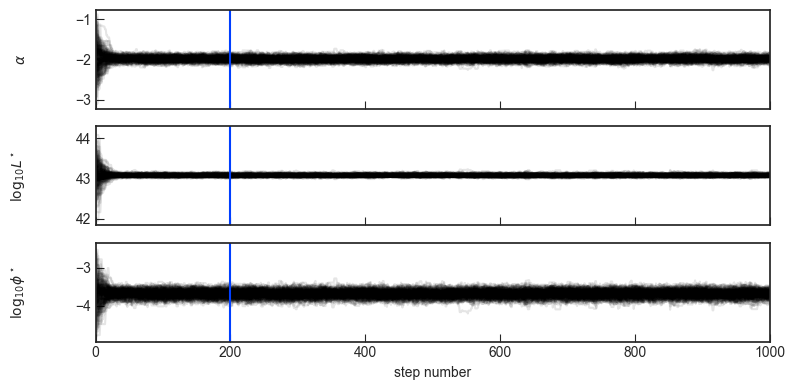

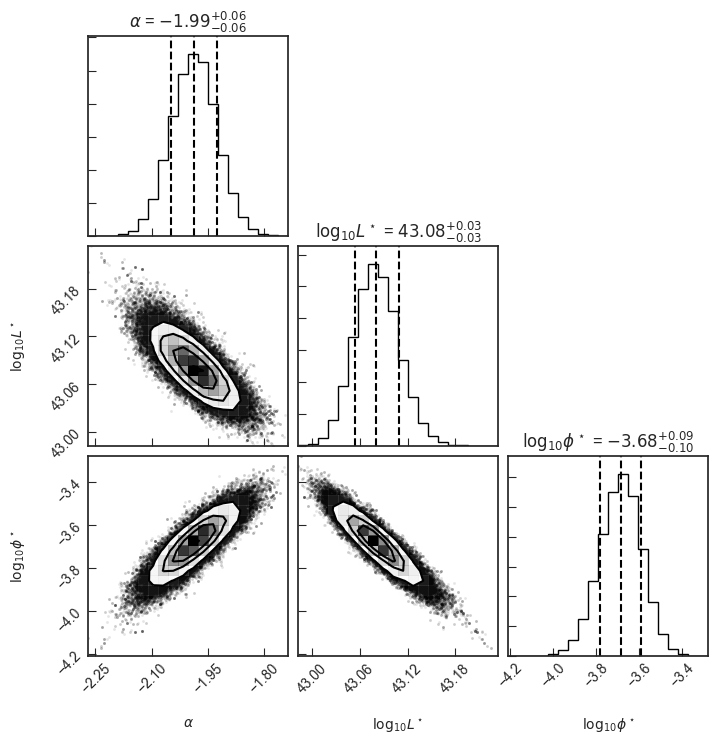

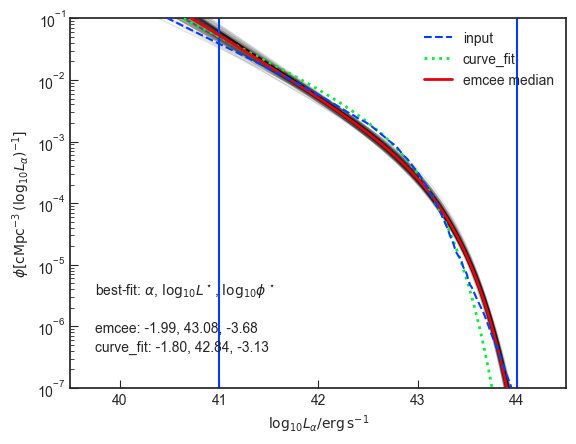

In [15]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=44., plot=True, plot_chains=True, save=True)

## 42.5 - 44

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 88.38it/s]


array([-3.0416482 , 43.34972144, -4.52335219])

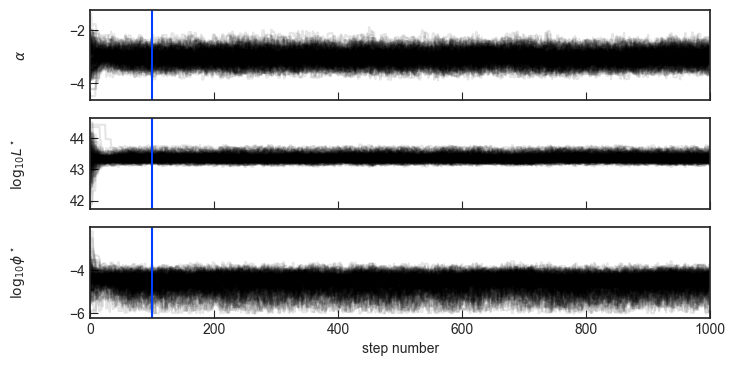

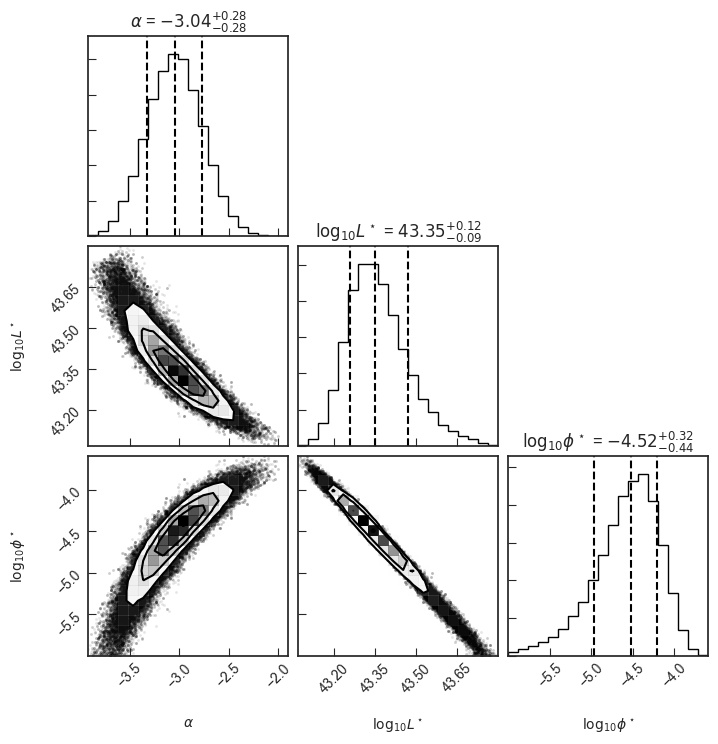

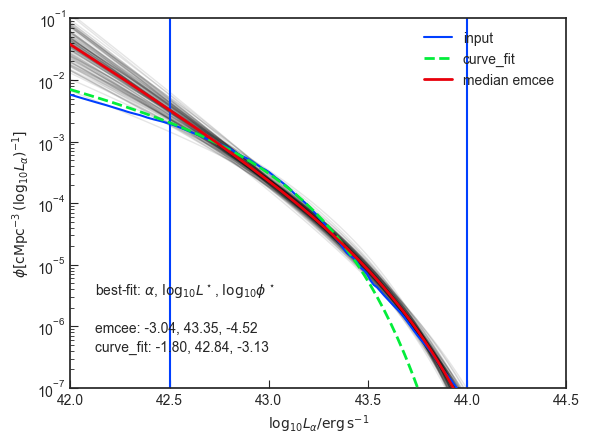

In [31]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=42.5, logL_max=44., plot=True)

## 40 - 44

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:14<00:00, 70.66it/s]


array([-1.88208414, 43.05043477, -3.57579472])

<Figure size 640x480 with 0 Axes>

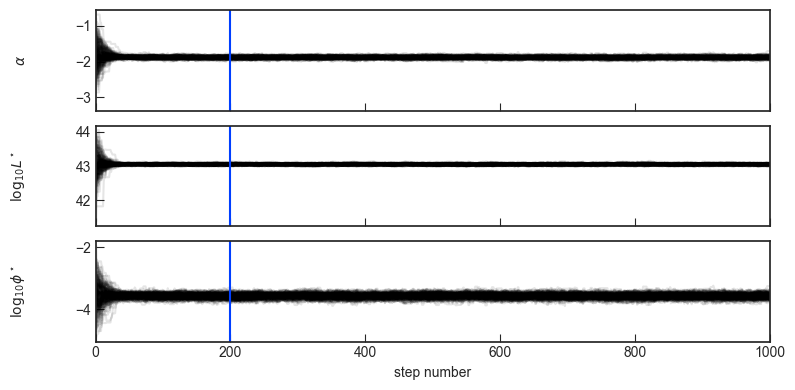

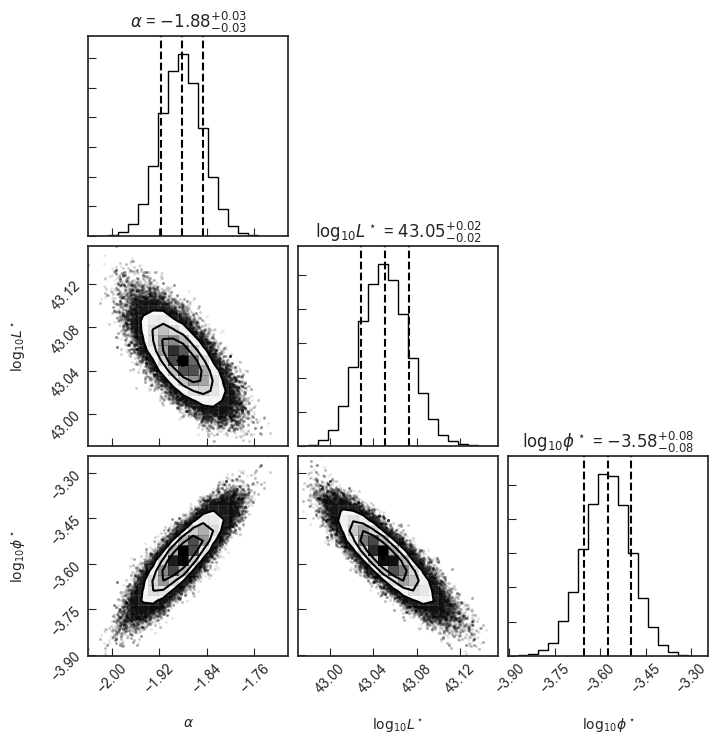

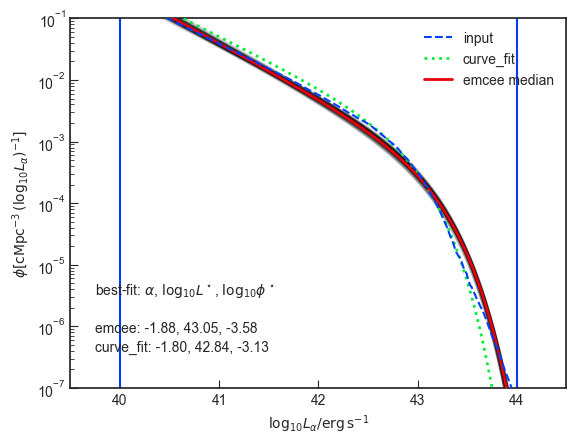

In [13]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=40., logL_max=44., plot=True, plot_chains=True, save=True)

## 41-43.5

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:17<00:00, 55.92it/s]


array([-1.74282048, 42.84413277, -3.15123403])

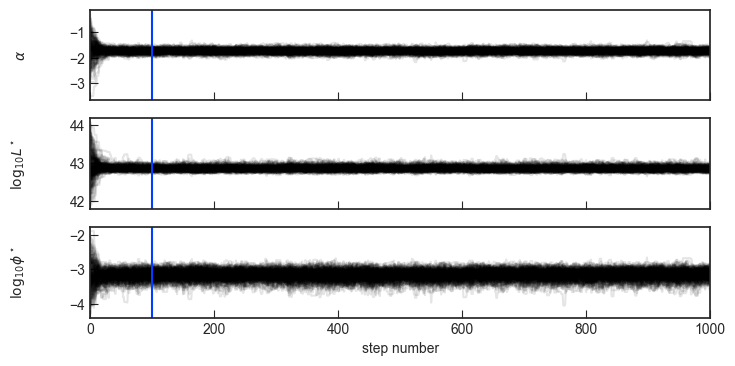

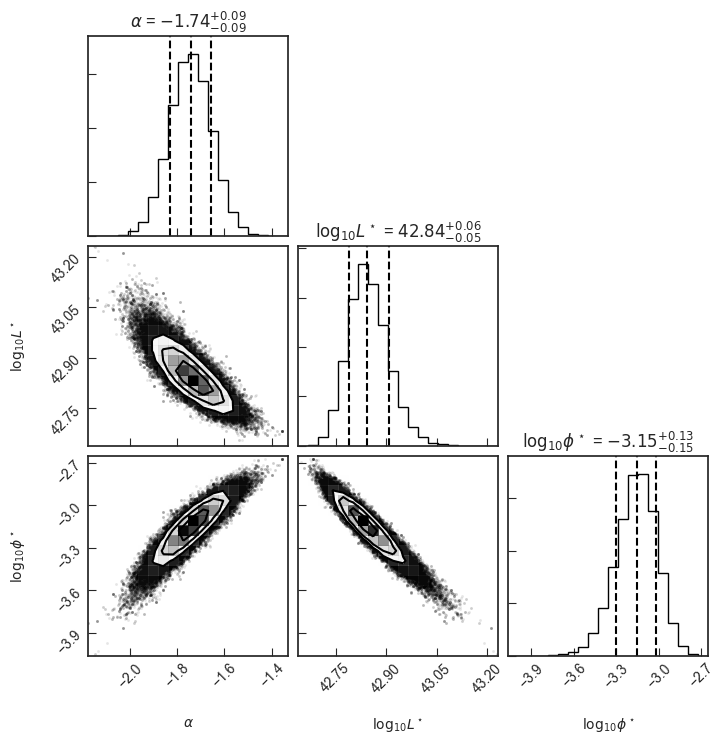

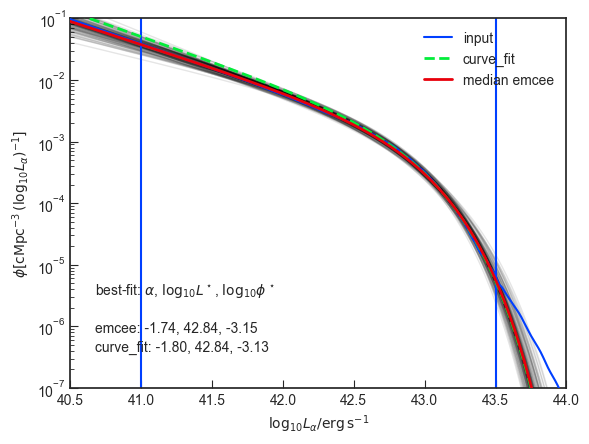

In [39]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=43.5, plot=True)



## 41 - 43.5 (using 0.1 errors on model)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 87.09it/s]


array([-1.85534025, 42.95895385, -3.39332872])

<Figure size 640x480 with 0 Axes>

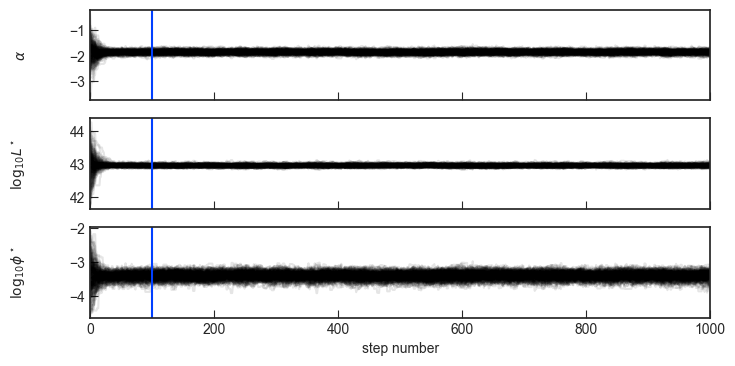

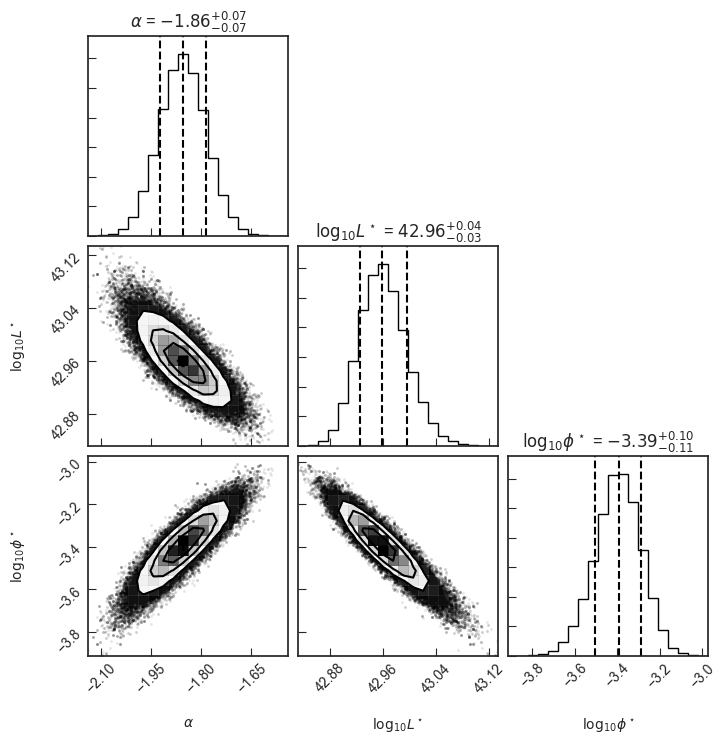

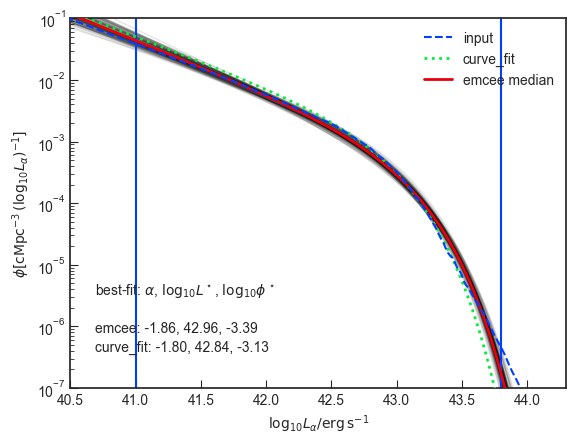

In [83]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=43.8, plot=True, plot_chains=True)


## 41-43

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:24<00:00, 41.15it/s]


array([-1.83567043, 43.12841526, -3.53954488])

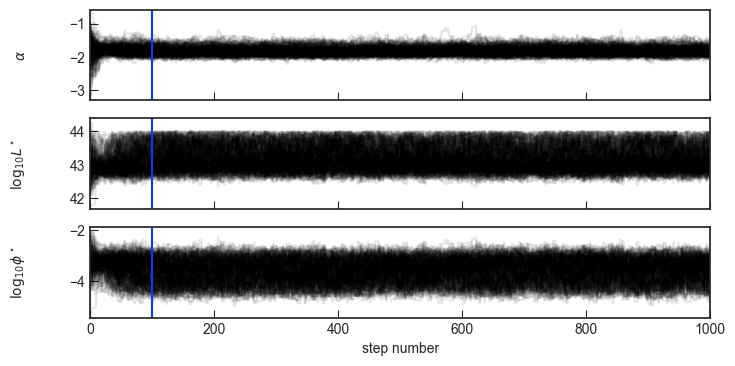

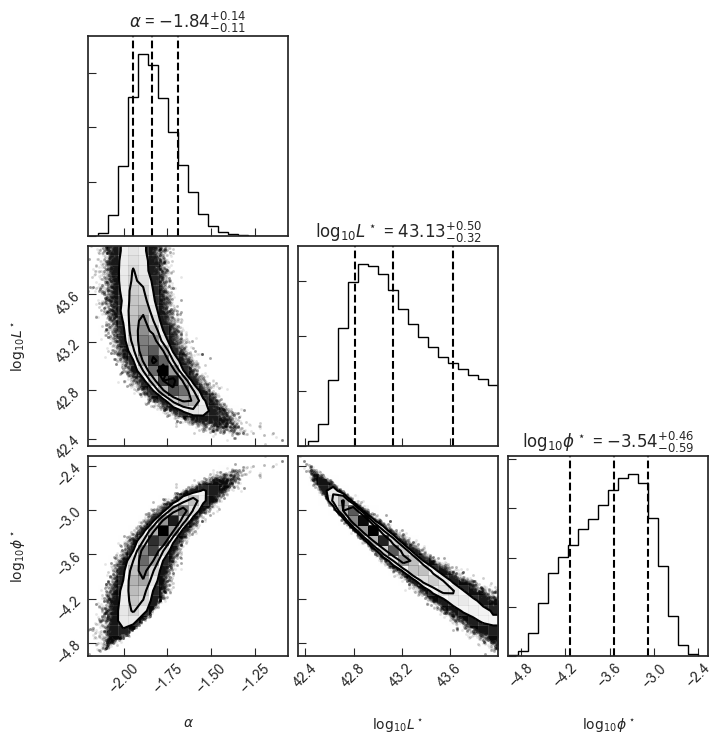

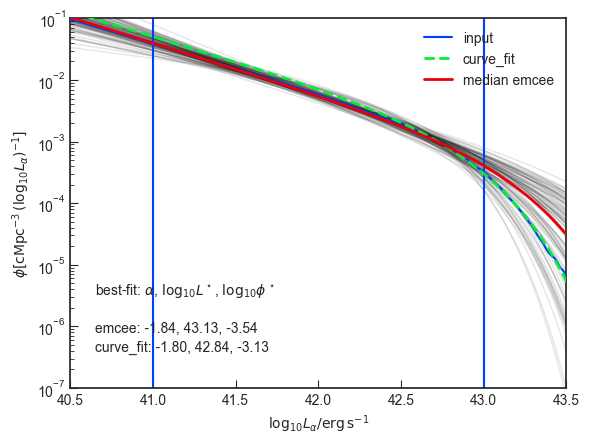

In [38]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=43., plot=True)


# z=10

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 88.81it/s]


array([-2.48668829, 43.01501129, -4.93433343])

<Figure size 640x480 with 0 Axes>

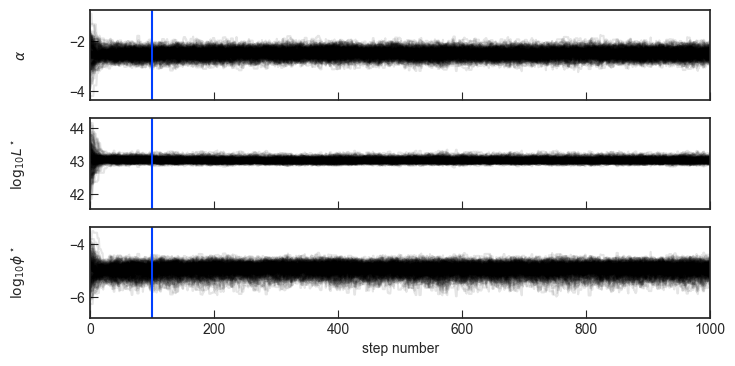

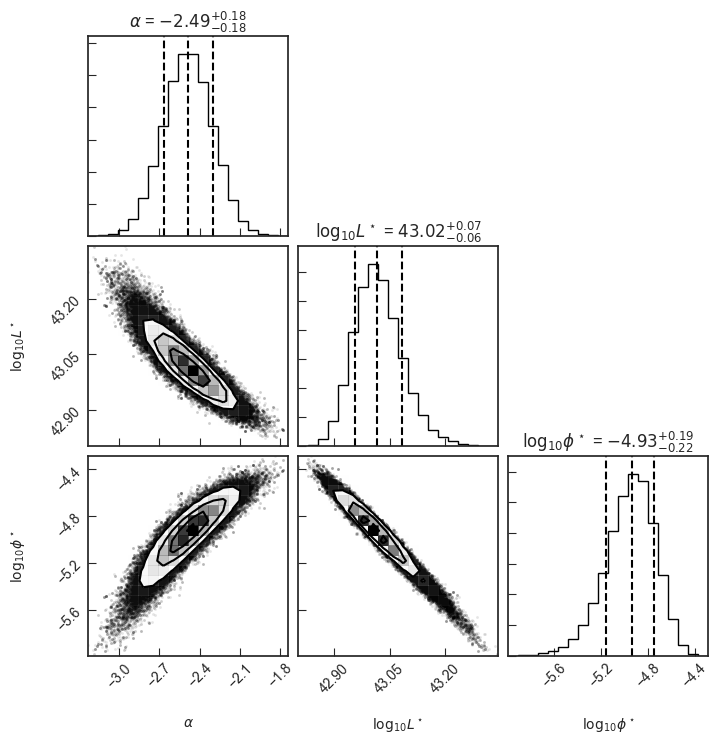

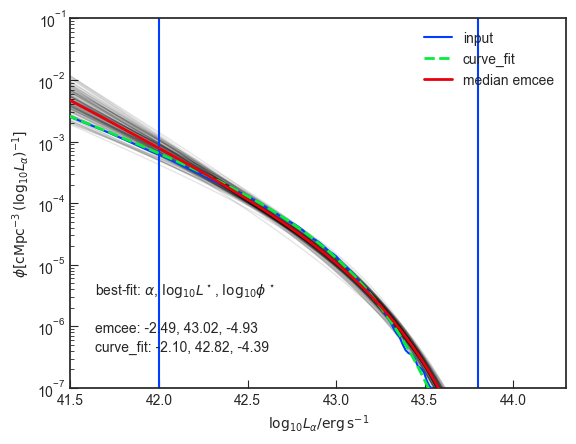

In [69]:
schechter_fit(zval_test=10., xHI_test=0.01, logL_min=42., logL_max=43.8, plot=True, plot_chains=True)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:10<00:00, 91.15it/s]


array([-3.1153579 , 43.11005275, -6.92718039])

<Figure size 640x480 with 0 Axes>

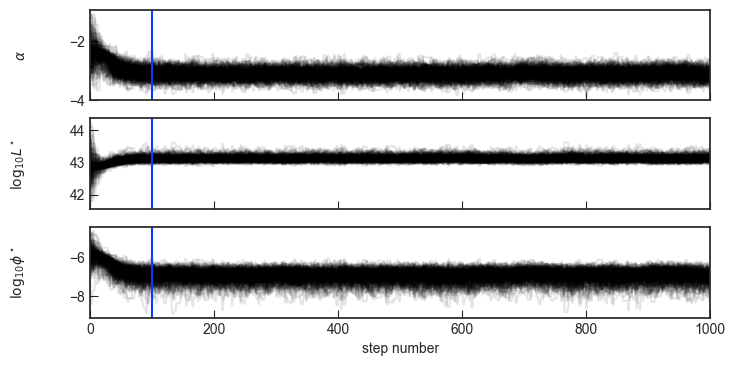

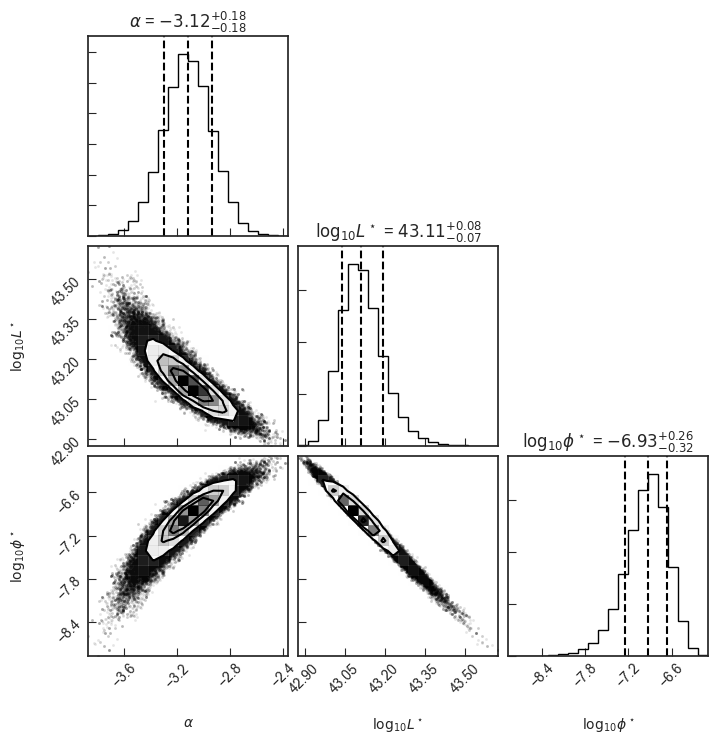

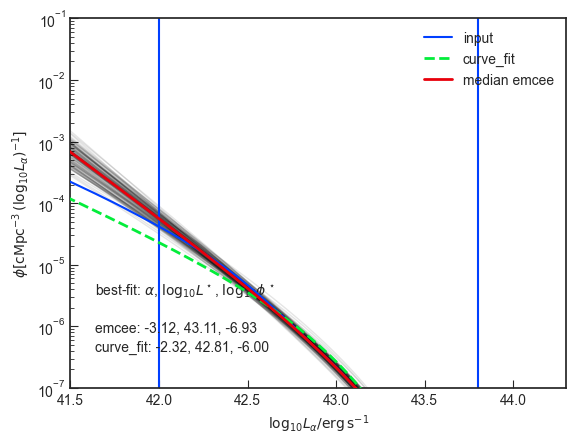

In [71]:
schechter_fit(zval_test=10., xHI_test=0.95, logL_min=42., logL_max=43.8, plot=True, plot_chains=True)

# Fake LF

In [33]:
def test_fit(params_true = [-2., 43., -3]):
    # log L grid
    logL = np.linspace(41, 44)

    # generate the LF from these parameters
    logL_LF = fs.schechter_logL(logL, *params_true)

    sampler = fs.fit_schechter_emcee(logL, logL_LF, logL_min=42.5, logL_max=44.)
    
    fs.plot_emcee(sampler, truths=params_true)
    
    plt.figure()
    fs.plot_emcee_draws(sampler, logL, logL_LF)
    
    del sampler

(38.0, 44.5)

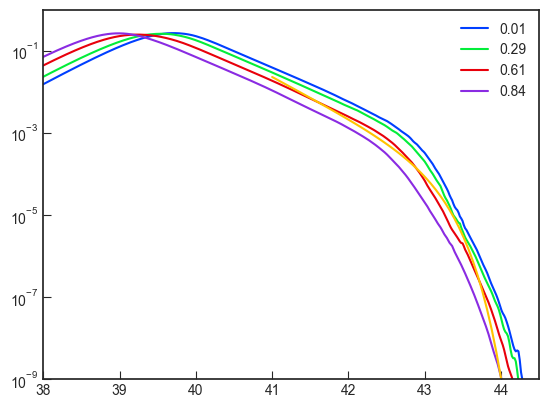

In [36]:
params_true = [-2., 43., -4]
logL = np.linspace(41, 44)
logL_LF = fs.schechter_logL(logL, *params_true)

for x in xHI[::10]:
    plt.semilogy(LF.log10_lg, LFdict[(z[2],x)], label=x)

plt.semilogy(logL, logL_LF)

plt.legend()
plt.ylim(1e-9,1)
plt.xlim(38., 44.5)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:10<00:00, 95.53it/s]


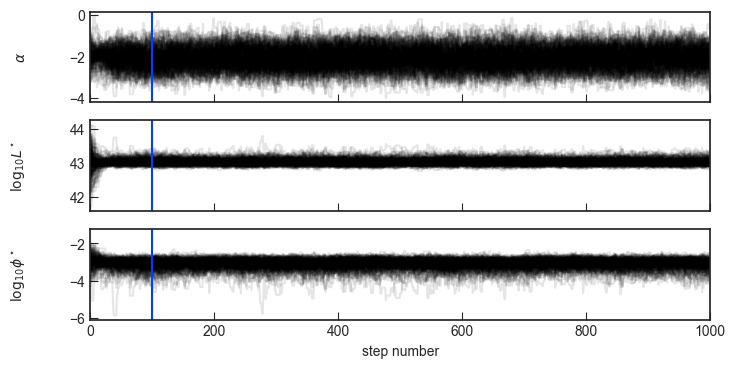

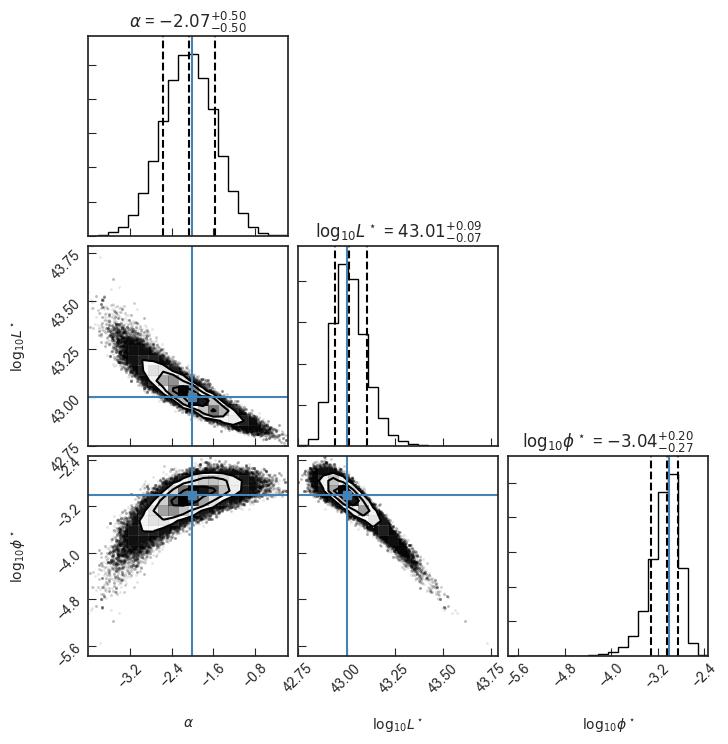

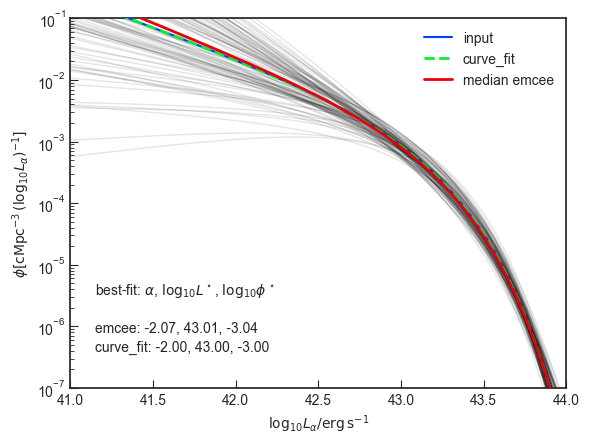

In [34]:
test_fit(params_true = [-2., 43., -3])

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:10<00:00, 98.99it/s]


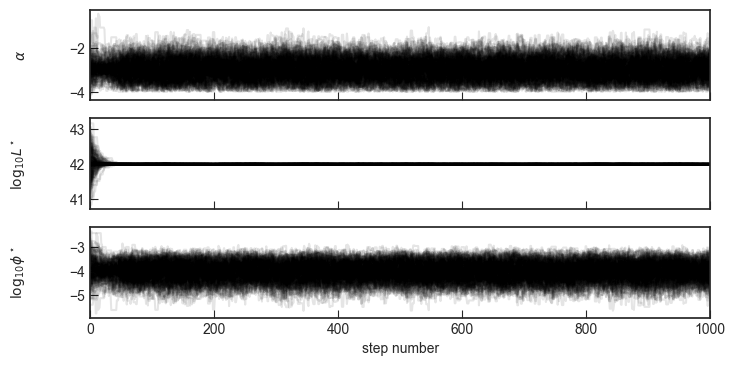

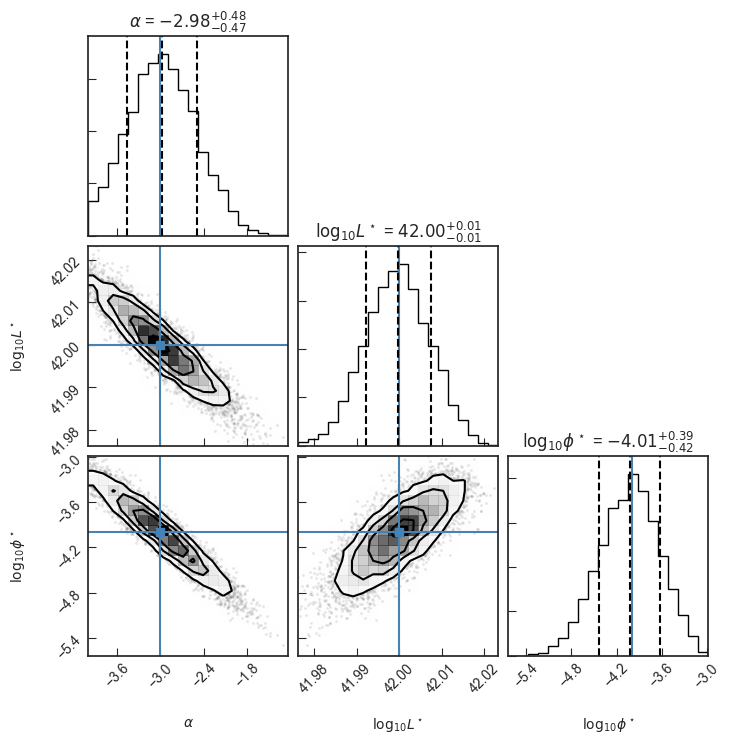

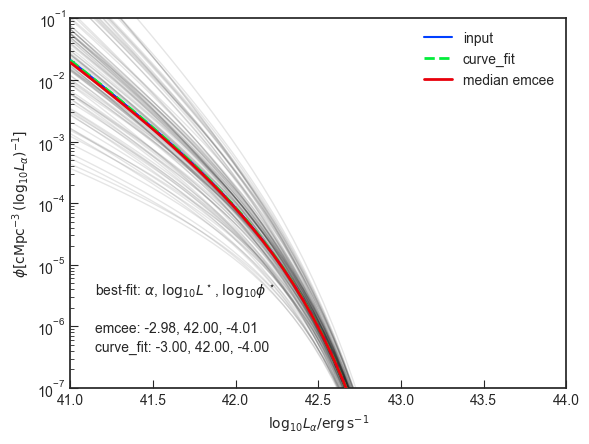

In [20]:
test_fit(params_true = [-3., 42., -4])

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 86.79it/s]


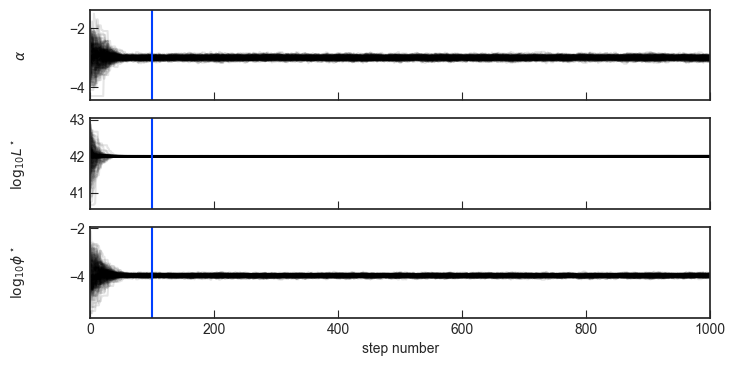

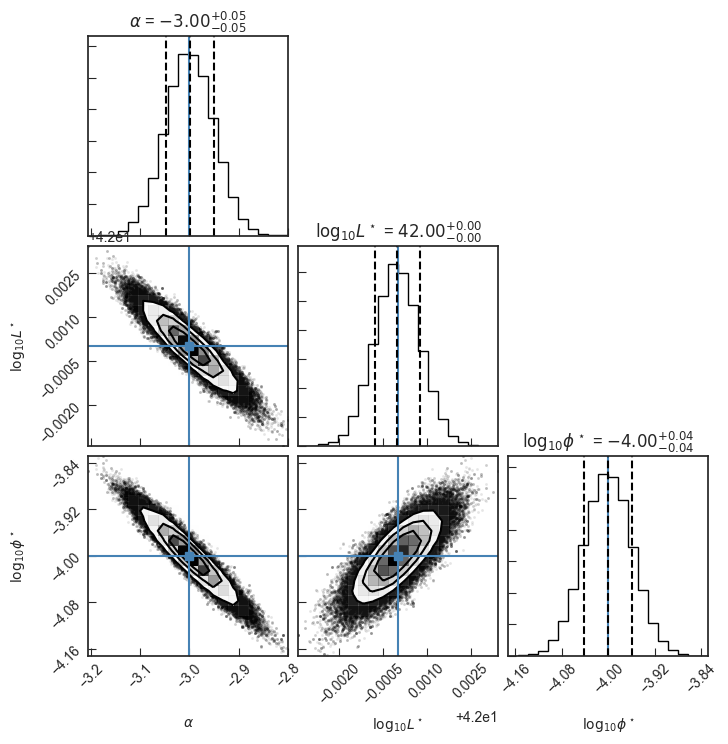

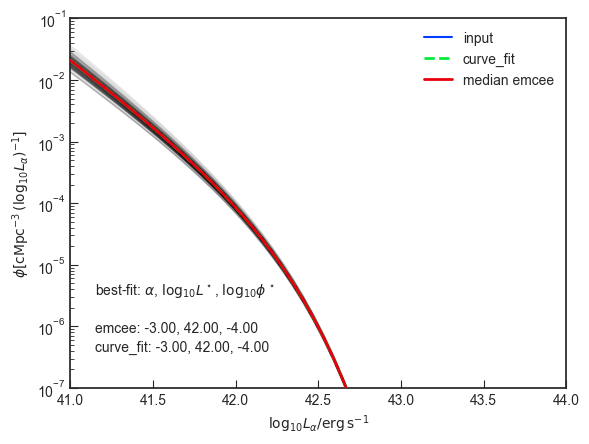

In [49]:
test_fit(params_true = [-3., 42., -4])

# Plot dictionaries

In [120]:
def dict_to_2Dplot(p_dict, p_index=0, p_name=r'$log(\phi^*)$ [Mpc$^{-3}$]', cmap='viridis', ax=None):
    """
    Input a dictionary with keys (z, xHI) with values p = (alpha, logLstar, logPhistar)
    Plot p(z, xHI) and xHI(z, p) -- requires interpolating.
    """
    keys    = np.array([[k[0], k[1]] for k in p_dict.keys()])
    z_all   = keys[:,0]
    xHI_all = keys[:,1]
    
    
    # find unique z and xHI values
    z_array   = np.unique(z_all)    
    xHI_array = np.unique(xHI_all)
    
    # Get all the values of the parameter (at index) from the dictionary
    p_values = np.array([v for v in p_dict.values()])[:,p_index]
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(4.6,4))
    im = ax.scatter(z_all, p_values, c=xHI_all, cmap=cmap, vmin=0, vmax=1.)
    ax.set_xlabel('Redshift, z')
    ax.set_ylabel(p_name) 
    if ax is None:
        plt.colorbar(im, label='Neutral Fraction $\overline{x}_\mathrm{HI}$')

    return im

/Users/cmason/Documents/Research/Projects/SAO-REU2020/CODE/run_LF.py:38: RuntimeWarning: divide by zero encountered in log10
  log10_lg = np.log10(lum_grid) #log10 luminosity grid in order to plot it on log10 scale similar to past works


In [121]:
dicts = sorted(reionizer.insensitive_glob('../data/Schechter_params_logL=*.npy'))
print(dicts)

['../data/Schechter_params_logL=40.0-43.5.npy', '../data/Schechter_params_logL=40.0-43.8.npy', '../data/Schechter_params_logL=40.0-44.0.npy', '../data/Schechter_params_logL=41.0-43.5.npy', '../data/Schechter_params_logL=41.0-43.8.npy', '../data/Schechter_params_logL=41.0-44.0.npy', '../data/Schechter_params_logL=42.5-43.5.npy', '../data/Schechter_params_logL=42.5-43.8.npy', '../data/Schechter_params_logL=42.5-44.0.npy']


In [122]:
labels = [r'$\alpha$', r'$L_\star$', r'$\Phi_\star$']

def plot_params(dict_file):
    logL = dict_file.split('=')[-1].split('.npy')[0]

    fig, ax = plt.subplots(1,3, figsize=(10,3.))
    fig.suptitle(f'log L = {logL}')
    Sch_dict = np.load(dict_file, allow_pickle=True).item()
    for i in range(len(labels)):
        im = dict_to_2Dplot(p_dict = Sch_dict, p_index=i, p_name=labels[i], ax=ax[i])
        
    plt.colorbar(im, label='Neutral Fraction $\overline{x}_\mathrm{HI}$')
    plt.tight_layout()

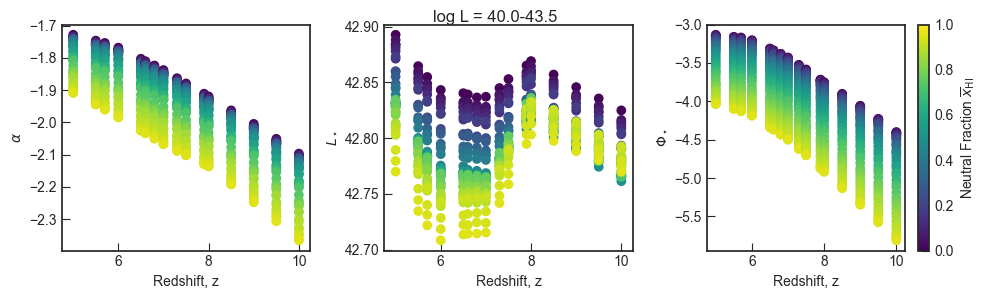

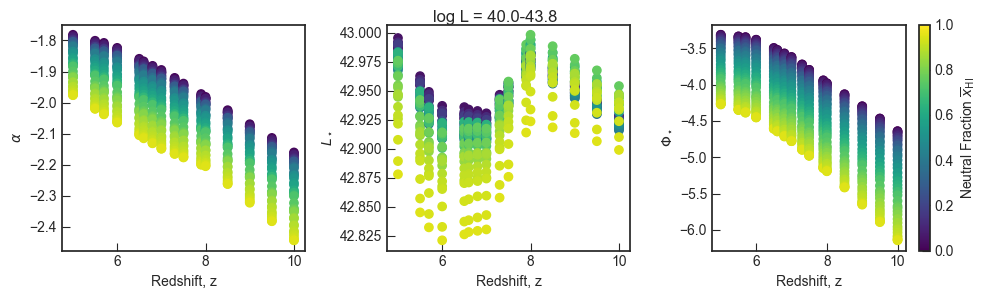

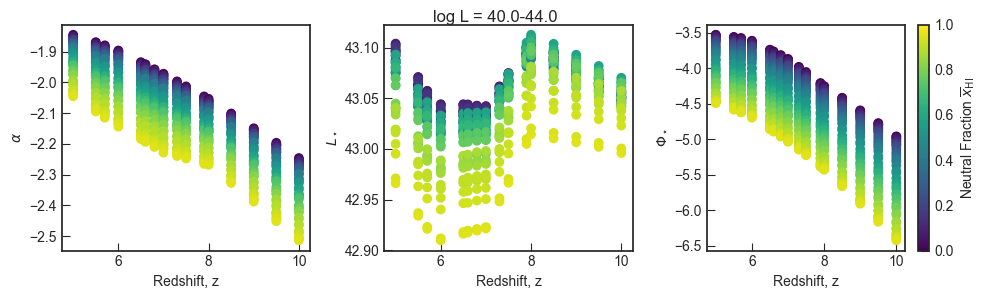

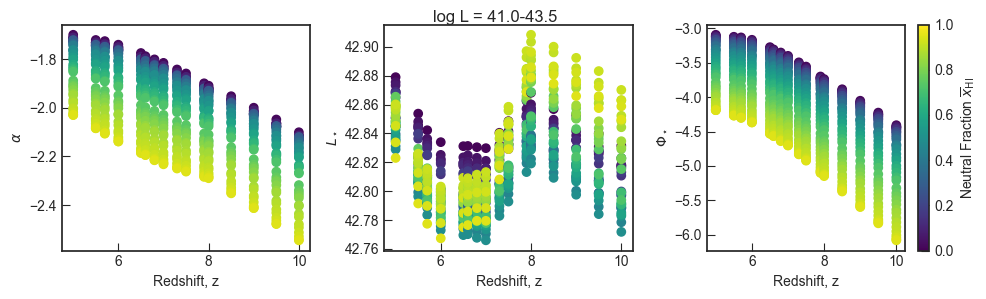

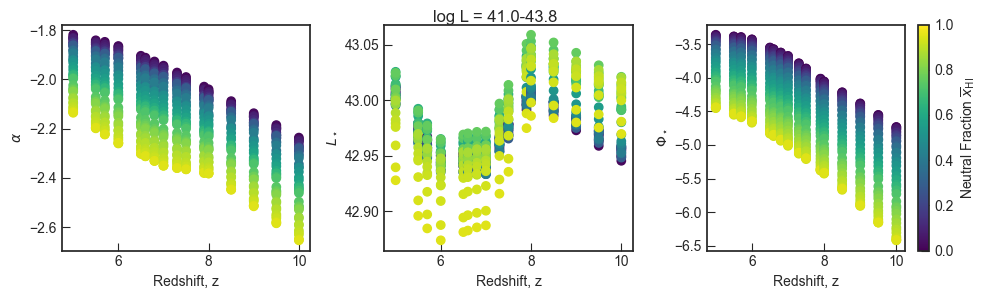

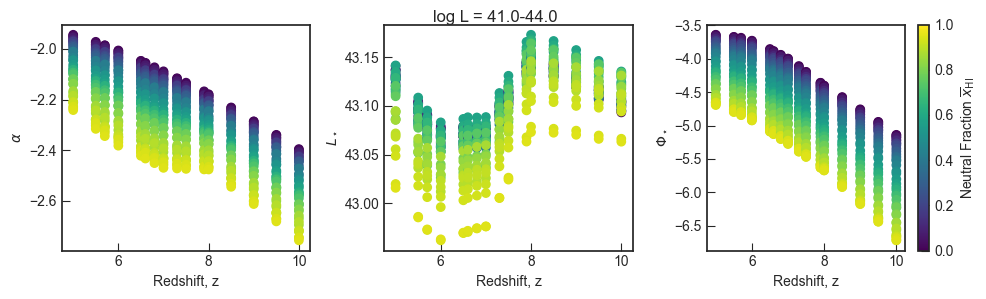

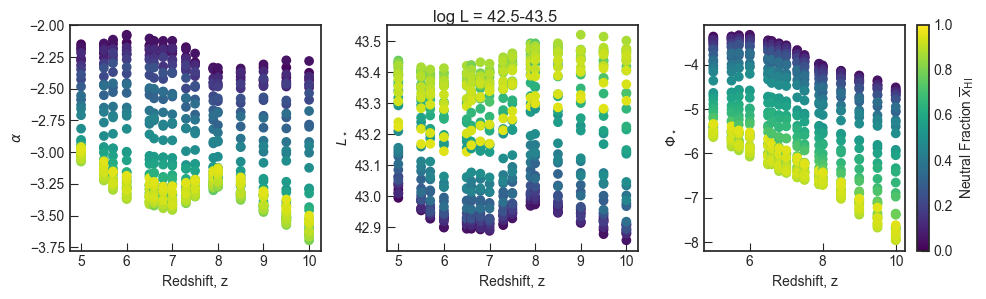

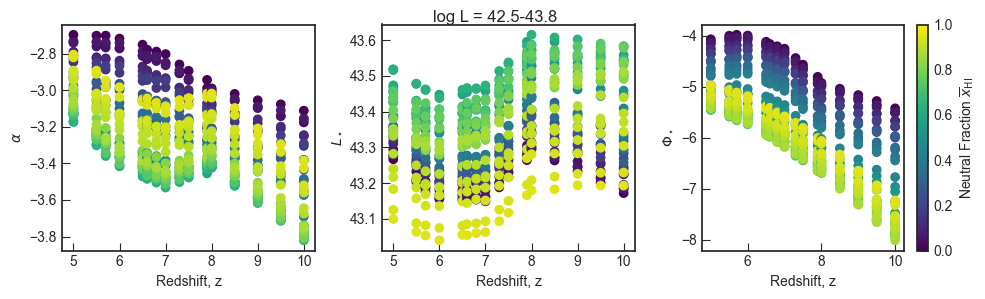

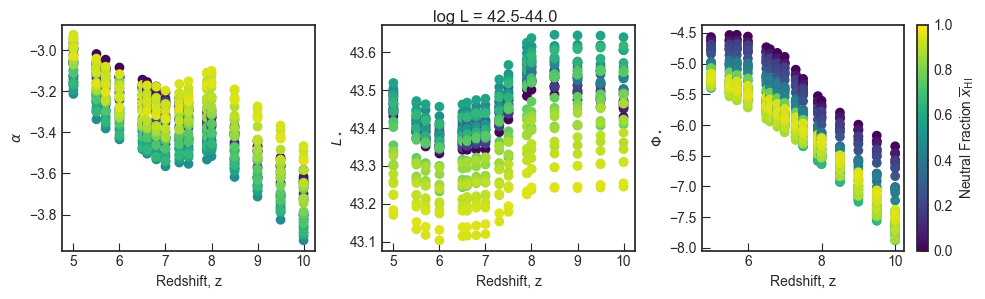

In [123]:
for d in dicts:
    plot_params(d)